In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, makedirs
from os.path import isfile, join, isdir

In [4]:
mypath = './random'
raw_path = mypath + '/raw'

In [5]:
files = [f for f in listdir(raw_path) if isfile(join(raw_path, f))]

In [6]:
for f in files:
    fp_read = open(raw_path + '/' + f, 'r')
    csv_lines = fp_read.readlines()
    data = [[float(i) for i in line.split(',')] for line in csv_lines[1:]]
    avg_list = [round(i,4) for i in np.mean(data, axis=0)]
    if not isdir(mypath + '/avg'):
        makedirs(mypath + '/avg')
    fp_write = open(mypath + '/avg/' + f, 'w')
    fp_write.write(csv_lines[0])
    for i in avg_list:
        fp_write.write(str(i))
        if i != avg_list[-1]:
            fp_write.write(',')

In [114]:
def get_list_data(file_list, training_instances):
    new_old_data = []
    new_old_labels = []
    for d in ['random', 'random_old', 'true_human_labels']:
        all_plot_data = []
        all_plot_labels = []
        for f in file_list:
            one_plot_data = []
            label_line = ''
            for n in training_instances:
                file_name = f.replace('ts', str(n))
                if d == 'true_human_labels':
                    file_name = 'true_' + file_name
                fp_read = open(d + '/avg/' + file_name, 'r')
                csv_lines = fp_read.readlines()
                label_line =  csv_lines[0]# stays the same through out this loop
                data_line = csv_lines[1]
                data = [float(i) for i in data_line.split(',')]
                one_plot_data.append(data)
            one_plot_data = list(map(list, zip(*one_plot_data)))
            all_plot_data.append(one_plot_data)
            all_plot_labels.append(label_line.split(','))
            if d == 'random':
                all_plot_labels[-1] = [label + '_new' for label in all_plot_labels[-1]]
            elif d == 'true_human_labels':
                all_plot_labels[-1] = [label + '_true' for label in all_plot_labels[-1]]
        new_old_labels.append(all_plot_labels)
        new_old_data.append(all_plot_data)
    return new_old_data, new_old_labels

def plot_data(file_list, training_instances, ignore_per_file):
    # new_old_data is a list (of size 2: for random, random_old) of list of matrices, each matrix is a list of accuracies for each algo, for each test size
    # ignore_per_file is a list of how many lists to ignore (from the front) for each file (for eg, each file starts with human, model -> give 2 to avoid plotting these)
    # new_old_labels is a list (of size 2: for random, random_old) of list of labels for each plot
    # ignore_per_file, all_plot_data, all_plot_labels have the same length
    new_old_data, new_old_labels = get_list_data(file_list, training_instances)
    training_instances = [str(ts) for ts in training_instances]
    # print(new_old_data)
    # print(new_old_labels)
    plt.figure(figsize=(5,3))
    for i in range(len(new_old_data[0])): #ith file
        for j in range(ignore_per_file[i], len(new_old_data[0][i])): #jth algo
            if new_old_labels[0][i][j] == 'pseudo_lb_new':
                continue
            plt.plot(training_instances, new_old_data[0][i][j], label=new_old_labels[0][i][j], marker='^')
    for i in range(len(new_old_data[1])):
        for j in range(ignore_per_file[i], len(new_old_data[1][i])):
            plt.plot(training_instances, new_old_data[1][i][j], label=new_old_labels[1][i][j], marker='o')
    for i in range(len(new_old_data[2])):
        for j in range(ignore_per_file[i], len(new_old_data[2][i])):
            plt.plot(training_instances, new_old_data[2][i][j], label=new_old_labels[2][i][j], marker='x')
    plt.xlabel('Training Instances')
    plt.ylabel('Accuracy')
    plt.xticks(training_instances)
    plt.title('Accuracy vs Training Instances')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [117]:
file_list = ['cnn_data_accuracy_[0.89, 0.62, 0.47, 0.45, 0.45, 0.41, 0.37]_ts_4_check_all.csv']
# file_list = ['cnn_data_accuracy_[0.92, 0.7, 0.68, 0.61, 0.55, 0.54, 0.52, 0.44, 0.36, 0.29]_ts_4_check_all.csv']

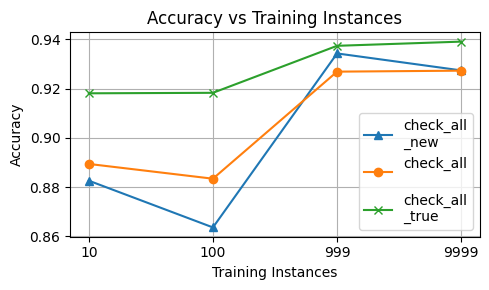

In [118]:
plot_data(file_list, [10, 100, 999, 9999], [2])